<a href="https://colab.research.google.com/github/Aman78695/Covid19_Severity_Prediction/blob/main/Covid19_Severity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests

url = "https://corona-virus-world-and-india-data.p.rapidapi.com/api"

headers = {
	"X-RapidAPI-Key": "e0bf02f078mshee834850ebffe98p194d62jsn37f0ecfd4adb",
	"X-RapidAPI-Host": "corona-virus-world-and-india-data.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

print(response.json()['countries_stat'])

[{'country_name': 'USA', 'cases': '82,649,779', 'deaths': '1,018,316', 'region': '', 'total_recovered': '80,434,925', 'new_deaths': '0', 'new_cases': '0', 'serious_critical': '1,465', 'active_cases': '1,196,538', 'total_cases_per_1m_population': '247,080', 'deaths_per_1m_population': '3,044', 'total_tests': '1,000,275,726', 'tests_per_1m_population': '2,990,303'}, {'country_name': 'India', 'cases': '43,057,545', 'deaths': '522,193', 'region': '', 'total_recovered': '42,519,479', 'new_deaths': '0', 'new_cases': '0', 'serious_critical': '698', 'active_cases': '15,873', 'total_cases_per_1m_population': '30,657', 'deaths_per_1m_population': '372', 'total_tests': '834,717,702', 'tests_per_1m_population': '594,319'}, {'country_name': 'Brazil', 'cases': '30,345,654', 'deaths': '662,663', 'region': '', 'total_recovered': '29,364,400', 'new_deaths': '0', 'new_cases': '0', 'serious_critical': '8,318', 'active_cases': '318,591', 'total_cases_per_1m_population': '140,954', 'deaths_per_1m_populatio

In [3]:
df=pd.DataFrame(response.json()['countries_stat'])

In [4]:
df

,country_name,cases,deaths,region,total_recovered,new_deaths,new_cases,serious_critical,active_cases,total_cases_per_1m_population,deaths_per_1m_population,total_tests,tests_per_1m_population
0,USA,"82,649,779","1,018,316",,"80,434,925",0,0,"1,465","1,196,538","247,080","3,044","1,000,275,726","2,990,303"
1,India,"43,057,545","522,193",,"42,519,479",0,0,698,"15,873","30,657",372,"834,717,702","594,319"
2,Brazil,"30,345,654","662,663",,"29,364,400",0,0,"8,318","318,591","140,954","3,078","63,776,166","296,238"
3,France,"28,244,977","145,020",,"25,852,832",0,0,"1,677","2,247,125","430,996","2,213","266,484,045","4,066,333"
4,Germany,"24,109,433","134,624",,"21,243,000",0,0,"1,980","2,731,809","286,106","1,598","122,332,384","1,451,714"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,MS Zaandam,9,2,,7,0,0,0,0,0,0,0,0
224,Niue,8,0,,7,0,0,0,1,"4,860",0,0,0
225,Nauru,3,0,,3,0,0,0,0,274,0,0,0
226,Saint Helena,2,0,,2,0,0,0,0,327,0,0,0


###KPIS

- KPIs are specific metrics that provide valuable insights into the performance or progress of a particular aspect of a project or business. In the context of COVID data, KPIs help us track and analyze key metrics related to cases, deaths, recoveries, and other relevant factors. Here are some examples of KPIs

- Total Cases:

This KPI represents the cumulative number of confirmed COVID cases in each country.
It provides an overall picture of the spread and impact of the virus in different regions.

- Total Deaths:

This KPI represents the total number of deaths due to COVID in each country.
It helps assess the severity and fatality rate of the virus in different populations.

- Total Recovered:

This KPI represents the total number of individuals who have recovered from COVID in each country.
It indicates the effectiveness of medical interventions and the resilience of the healthcare system.

- Active Cases:

This KPI represents the current active cases of COVID in each country.
It helps understand the current burden on healthcare resources and the potential for further spread.

- New Cases:

This KPI represents the daily or periodic increase in COVID cases in each country.
It provides insights into the rate of infection and the effectiveness of containment measures.

- New Deaths:

This KPI represents the daily or periodic increase in COVID-related deaths in each country.
It helps monitor the impact of the virus on mortality rates and the effectiveness of healthcare systems.

- Serious/Critical Cases:

This KPI represents the number of COVID cases classified as serious or critical in each country.
It indicates the strain on healthcare facilities and the severity of the disease in specific individuals.

- Tests per 1 Million Population:

This KPI represents the number of COVID tests conducted per 1 million population in each country.
It provides insights into the testing capacity and strategy of different regions.

### Why do EDA

- Model building
- Analysis and reporting
- Validate assumptions
- Handling missing values
- feature engineering
- detecting outliers

In [5]:
df.head()

,country_name,cases,deaths,region,total_recovered,new_deaths,new_cases,serious_critical,active_cases,total_cases_per_1m_population,deaths_per_1m_population,total_tests,tests_per_1m_population
0,USA,"82,649,779","1,018,316",,"80,434,925",0,0,"1,465","1,196,538","247,080","3,044","1,000,275,726","2,990,303"
1,India,"43,057,545","522,193",,"42,519,479",0,0,698,"15,873","30,657",372,"834,717,702","594,319"
2,Brazil,"30,345,654","662,663",,"29,364,400",0,0,"8,318","318,591","140,954","3,078","63,776,166","296,238"
3,France,"28,244,977","145,020",,"25,852,832",0,0,"1,677","2,247,125","430,996","2,213","266,484,045","4,066,333"
4,Germany,"24,109,433","134,624",,"21,243,000",0,0,"1,980","2,731,809","286,106","1,598","122,332,384","1,451,714"


In [6]:
df.shape

(228, 13)

In [7]:
df.drop(columns='region',inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   country_name                   228 non-null    object
 1   cases                          228 non-null    object
 2   deaths                         228 non-null    object
 3   total_recovered                228 non-null    object
 4   new_deaths                     228 non-null    object
 5   new_cases                      228 non-null    object
 6   serious_critical               228 non-null    object
 7   active_cases                   228 non-null    object
 8   total_cases_per_1m_population  228 non-null    object
 9   deaths_per_1m_population       228 non-null    object
 10  total_tests                    228 non-null    object
 11  tests_per_1m_population        228 non-null    object
dtypes: object(12)
memory usage: 21.5+ KB


In [9]:
for i in df.iloc[:,1:].columns:
  df[i]=pd.to_numeric(df[i].str.replace(',',''),errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country_name                   228 non-null    object 
 1   cases                          228 non-null    int64  
 2   deaths                         228 non-null    int64  
 3   total_recovered                213 non-null    float64
 4   new_deaths                     228 non-null    int64  
 5   new_cases                      228 non-null    int64  
 6   serious_critical               228 non-null    int64  
 7   active_cases                   213 non-null    float64
 8   total_cases_per_1m_population  228 non-null    int64  
 9   deaths_per_1m_population       228 non-null    int64  
 10  total_tests                    228 non-null    int64  
 11  tests_per_1m_population        228 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 2

### Column Types

- **Numerical** - cases,deaths,total_recovered,_new_deaths......
- **Categorical** - country_name


### Univariate Analysis

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

#### The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

- **Normal Distribution**: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- **Skewed Distribution**: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- **Bimodal Distribution**: A distribution with two peaks or modes.

- **Uniform Distribution**: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

#### **Dispersion** is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.

There are several measures of dispersion, including:

- **Range**: The difference between the largest and smallest values in a data set.

- **Variance**: The average of the squared deviations of each value from the mean of the data set.

- **Standard Deviation**: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

- **Interquartile range (IQR)**: The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

In [11]:
# Set the float format option to display numbers without scientific notation
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

In [12]:
df['cases'].describe()

count        228.00
mean     2233635.81
std      7399087.13
min            1.00
25%        22583.75
50%       163079.00
75%      1065043.50
max     82649779.00
Name: cases, dtype: float64

<Axes: xlabel='cases', ylabel='Density'>

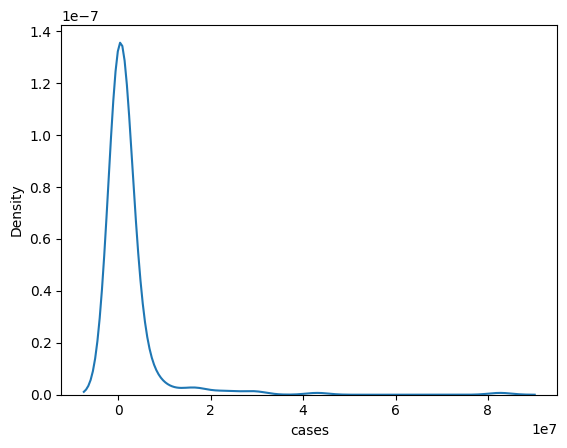

In [13]:
sns.kdeplot(df['cases'])

<Axes: >

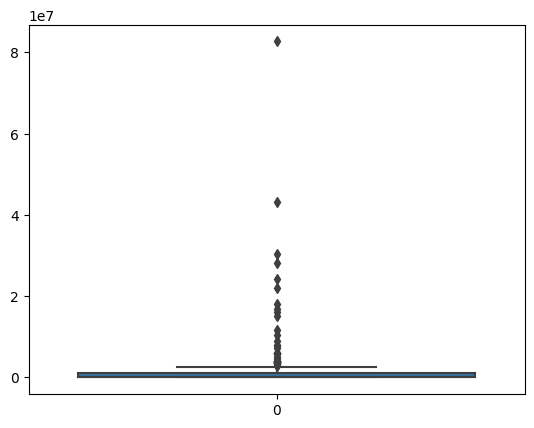

In [14]:
sns.boxplot(df['cases'])

##Conclusion

**Skewness:** The skewness of the data can be estimated by looking at the difference between the mean and the median. In this case, the mean (2233635.81) is higher than the median (163079.00), which suggests a right-skewed distribution. However, for a more accurate assessment of skewness, we can use the skew() function in pandas.The kde plot also suuggest the data is right skewed,which suggests some countries were recording high cases compared to others.



**Outliers:** The presence of outliers can be identified by examining the minimum and maximum values. In this case, the maximum  82649779.00 significantly higher than the 75th percentile value of 1065043.50, suggesting the possibility of outliers in the upper range.  further investigating outliers using box plots or other visualization techniques.




In [15]:
df['deaths'].describe()

count       228.00
mean      27379.43
std       97055.87
min           0.00
25%         180.00
50%        1913.50
75%       12378.25
max     1018316.00
Name: deaths, dtype: float64

<Axes: xlabel='deaths', ylabel='Density'>

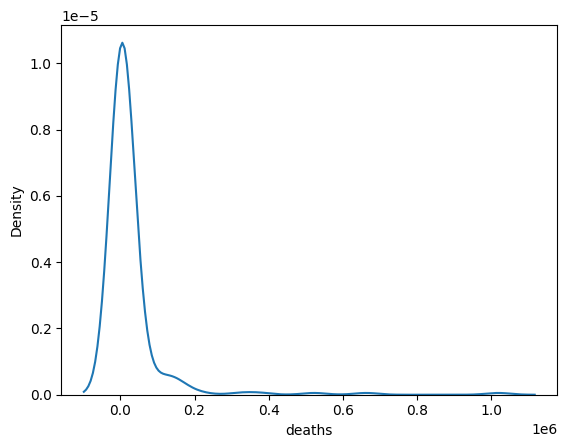

In [16]:
sns.kdeplot(df['deaths'])

<Axes: >

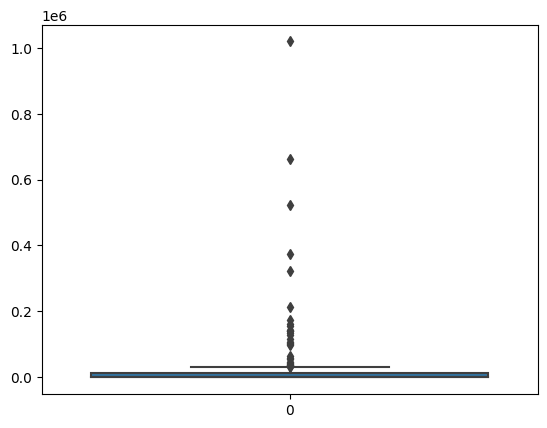

In [17]:
sns.boxplot(df['deaths'])

##Conclusion

**Skewness:** The skewness of the data can be estimated by looking at the difference between the mean and the median. In this case, the mean 27379.43 is higher than the median 1913.50, which suggests a right-skewed distribution. However, for a more accurate assessment of skewness, we can use the skew() function in pandas.The kde plot also suuggest the data is right skewed,which suggests some countries were recording high cases compared to others.



**Outliers:** The presence of outliers can be identified by examining the minimum and maximum values. In this case, the maximum  1018316.00 significantly higher than the 75th percentile value of 12378.25, suggesting the possibility of outliers in the upper range.  further investigating outliers using box plots or other visualization techniques.

In [18]:
df.columns

Index(['country_name', 'cases', 'deaths', 'total_recovered', 'new_deaths',
       'new_cases', 'serious_critical', 'active_cases',
       'total_cases_per_1m_population', 'deaths_per_1m_population',
       'total_tests', 'tests_per_1m_population'],
      dtype='object')

###How does the number of cases, deaths, and recoveries vary across different countries?

- The code first selects the 'country_name' and 'cases' columns from the DataFrame. It then sets the 'country_name' column as the index and sorts the DataFrame in descending order based on the 'cases' column. Finally, it selects the top 5 countries with the highest number of cases and creates a bar plot using the 'cases' values for each country.

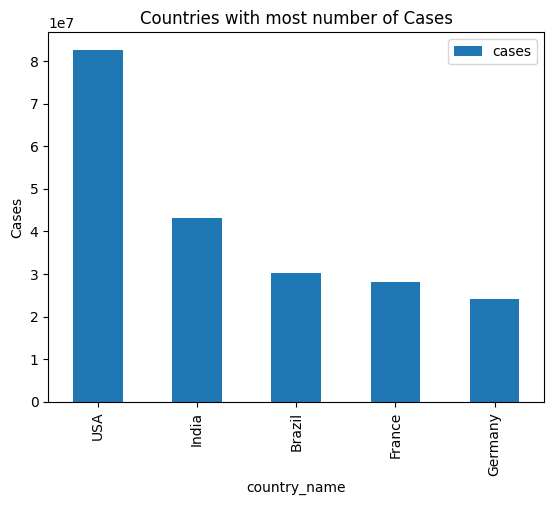

In [19]:
#top 5 country cases wise
df[['country_name','cases']].set_index('country_name').sort_values('cases',ascending=False).head().plot(kind='bar')
plt.title('Countries with most number of Cases')
plt.ylabel('Cases')
plt.show()

- Conclusion--
The most number of cases recorded in USA,followed by India and the Brazil.

In [20]:
#creating new dataframe of first five rows
new_df=df.head(25)

- This code generates a scatter plot that shows the relationship between the number of cases and the number of deaths for each country, with the size of the markers reflecting the deaths per 1 million population. The country names are also displayed next to their respective data points for easy identification.

Text(0, 0.5, 'Deaths')

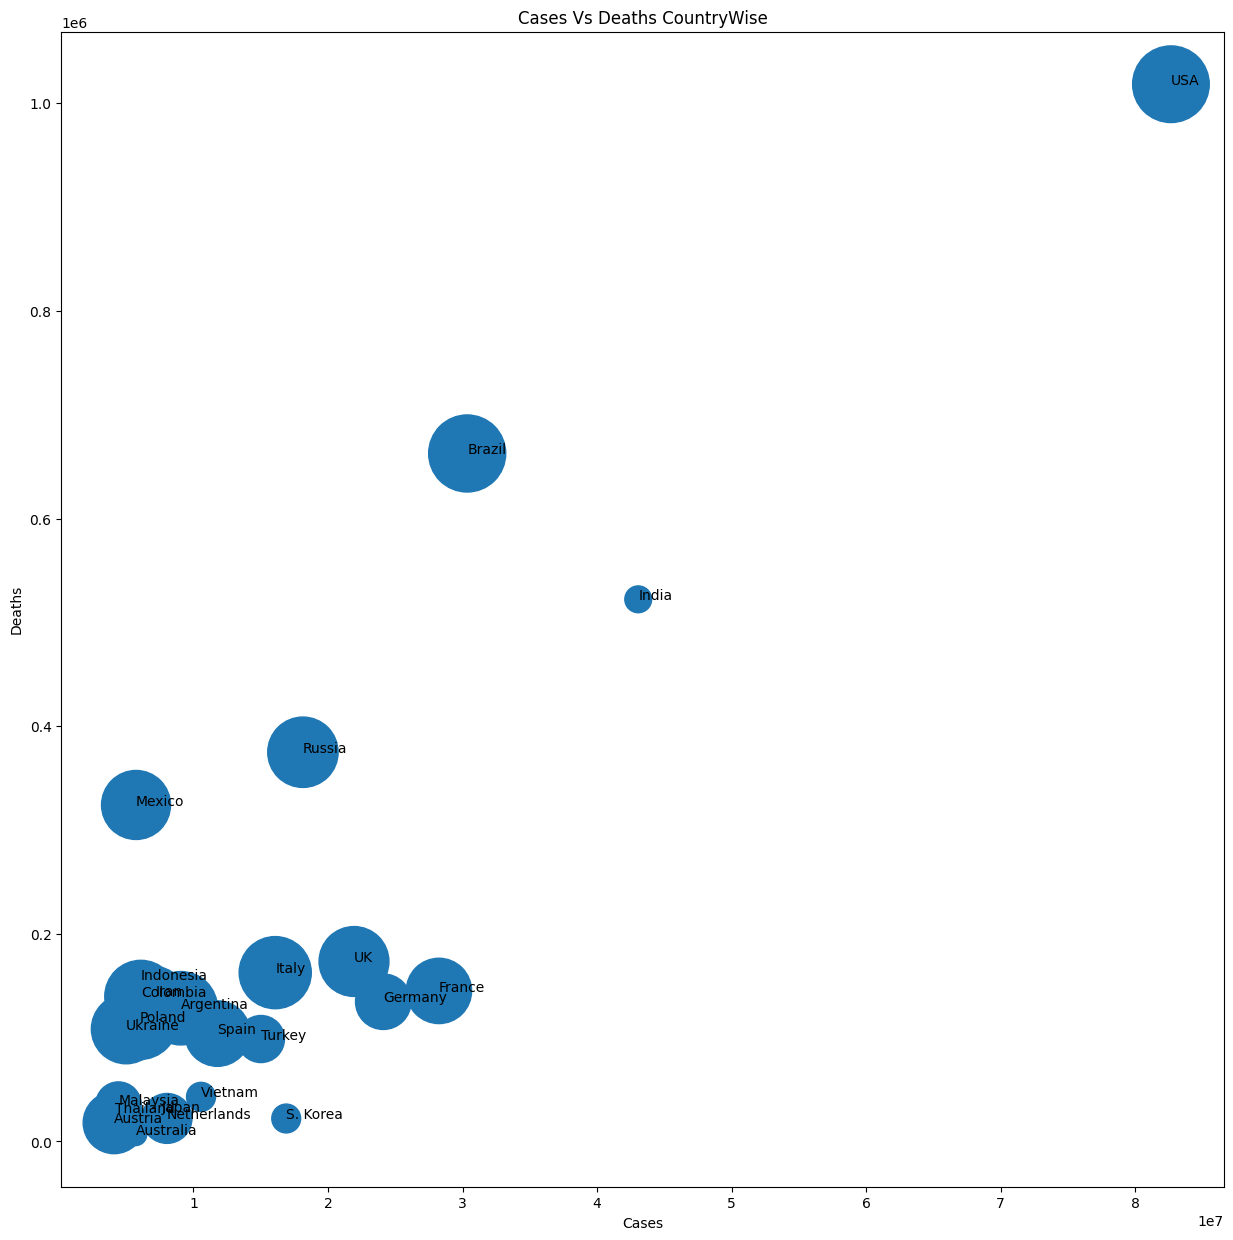

In [21]:
plt.figure(figsize=(15,15))
plt.scatter(new_df['cases'],new_df['deaths'],s=new_df['deaths_per_1m_population'])
for i in range(new_df.shape[0]):
  plt.text(new_df['cases'].values[i],new_df['deaths'].values[i],new_df['country_name'].values[i])
plt.title('Cases Vs Deaths CountryWise')
plt.xlabel('Cases')
plt.ylabel('Deaths')

- Conclusion--Despite India recording many cases the deaths per million is very low for India.

In [22]:
new_df.head()

,country_name,cases,deaths,total_recovered,new_deaths,new_cases,serious_critical,active_cases,total_cases_per_1m_population,deaths_per_1m_population,total_tests,tests_per_1m_population
0,USA,82649779,1018316,80434925.00,0,0,1465,1196538.00,247080,3044,1000275726,2990303
1,India,43057545,522193,42519479.00,0,0,698,15873.00,30657,372,834717702,594319
2,Brazil,30345654,662663,29364400.00,0,0,8318,318591.00,140954,3078,63776166,296238
3,France,28244977,145020,25852832.00,0,0,1677,2247125.00,430996,2213,266484045,4066333
4,Germany,24109433,134624,21243000.00,0,0,1980,2731809.00,286106,1598,122332384,1451714


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


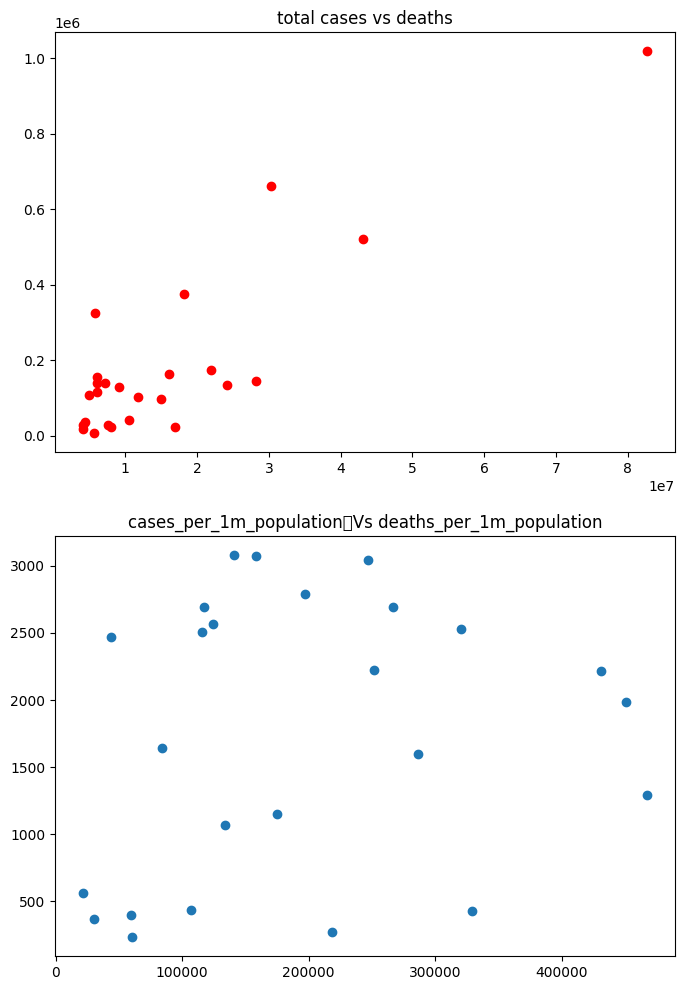

In [23]:
#side-by-side comparison of the two relationships and provides insights into the patterns and correlations between the variables in the COVID-19 data.
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(8,12))
ax[0].scatter(new_df['cases'],new_df['deaths'],color='red')

ax[0].set_title('total cases vs deaths')

ax[1].scatter(new_df['total_cases_per_1m_population'],new_df['deaths_per_1m_population'])
ax[1].set_title('cases_per_1m_population	Vs deaths_per_1m_population')
plt.show()

- The resulting visualization consists of two scatter plots. The first plot shows the relationship between the total number of cases and deaths for each country, with red markers representing the data points. The second plot displays the relationship between the total cases per 1 million population and deaths per 1 million population for each country. Each subplot has its own title for clarity.

In [24]:
#Importing plotly.express as px for interactive and visually appealing data visualizations.
import plotly.express as px

In [25]:
#
#Filtering the new_df DataFrame to include only the rows where the country name is either 'USA', 'India', or 'Brazil',
#and selecting the columns 'country_name', 'cases', 'deaths', and 'total_recovered'.
temp_df=new_df[new_df['country_name'].isin(['USA','India','Brazil'])][['country_name','cases','deaths','total_recovered']]

In [26]:
temp_df

,country_name,cases,deaths,total_recovered
0,USA,82649779,1018316,80434925.00
1,India,43057545,522193,42519479.00
2,Brazil,30345654,662663,29364400.00


In [27]:
#creating interactive plot through plotly express
px.bar(temp_df,x='country_name',y=temp_df.columns,barmode='group',text_auto=True)

-  A grouped bar chart that visually compares the COVID-19 statistics (cases, deaths, total recoveries) for the countries USA, India, and Brazil. This visualization allows for easy comparison of the data across different countries.

In [28]:
px.histogram(new_df,x='deaths',text_auto=True)

In [29]:
#country wise cases percentage
px.pie(new_df,values='cases',names='country_name')

In [30]:
#country wise deaths percentage
px.pie(new_df,values='deaths',names='country_name')


In [31]:
#country wise deaths per 1 m population
px.pie(new_df,values='deaths_per_1m_population',names='country_name')

### How does the number of tests performed correlate with the total number of cases and deaths?

In [36]:
px.scatter(new_df,x='total_tests',y='cases',color='country_name',size='deaths')

- The scatter plot visually represents the relationship between the total number of tests conducted ('total_tests') and the number of COVID-19 cases ('cases'). The marker colors indicate different countries, while the marker sizes represent the number of deaths. The plot can help identify any potential patterns or trends between testing efforts, case numbers, and mortality rates across countries.

### Feature Engineering


- Calculating the recovery rate:

Creating a new feature by dividing the total_recovered by the total_cases, representing the proportion of recovered cases out of total cases. This metric provides insights into the effectiveness of treatment and recovery efforts.

In [ ]:
new_df['recover_rate']=new_df['total_recovered']/new_df['cases']

- Calculating the mortality rate:

Creating a new feature by dividing the total_deaths by the total_cases, representing the proportion of deaths out of total cases. This metric helps assess the severity of the disease and the fatality rate.

In [ ]:
new_df['mortality_rate']=new_df['deaths']/new_df['cases']

###Dropping the irrevelant columns

In [43]:
new_df.drop(columns=['new_deaths','new_cases','total_cases_per_1m_population','deaths_per_1m_population','tests_per_1m_population'],inplace=True)

<ipython-input-43-1ec74dcbf31f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
new_df.drop(columns=['cases_growth_rate'],inplace=True)

<ipython-input-45-76a4c516b717>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
new_df.dropna(inplace=True)

<ipython-input-48-ca20e18b38b5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
new_df

,country_name,cases,deaths,total_recovered,serious_critical,active_cases,total_tests,recover_rate,mortality_rate
0,USA,82649779,1018316,80434925.00,1465,1196538.00,1000275726,0.97,0.01
1,India,43057545,522193,42519479.00,698,15873.00,834717702,0.99,0.01
2,Brazil,30345654,662663,29364400.00,8318,318591.00,63776166,0.97,0.02
3,France,28244977,145020,25852832.00,1677,2247125.00,266484045,0.92,0.01
4,Germany,24109433,134624,21243000.00,1980,2731809.00,122332384,0.88,0.01
5,UK,21933206,173352,20782350.00,339,977504.00,514985782,0.95,0.01
6,Russia,18137137,374902,17474628.00,2300,287607.00,273400000,0.96,0.02
8,Italy,16079209,162609,14684371.00,409,1232229.00,211365630,0.91,0.01
9,Turkey,15016270,98676,14854475.00,975,63119.00,158110923,0.99,0.01
10,Spain,11786036,103908,11261340.00,339,420788.00,471036328,0.96,0.01


##Creating Target Variable

In [50]:
new_df['severity']=new_df['mortality_rate'].apply(lambda x:'high' if x>0.01 else 'moderate')

<ipython-input-50-e1658ea7574f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
new_df.head()

,country_name,cases,deaths,total_recovered,serious_critical,active_cases,total_tests,recover_rate,mortality_rate,severity
0,USA,82649779,1018316,80434925.00,1465,1196538.00,1000275726,0.97,0.01,high
1,India,43057545,522193,42519479.00,698,15873.00,834717702,0.99,0.01,high
2,Brazil,30345654,662663,29364400.00,8318,318591.00,63776166,0.97,0.02,high
3,France,28244977,145020,25852832.00,1677,2247125.00,266484045,0.92,0.01,moderate
4,Germany,24109433,134624,21243000.00,1980,2731809.00,122332384,0.88,0.01,moderate


- Categorical Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to the country_name column and transform the values
new_df['country_code'] = label_encoder.fit_transform(new_df['country_name'])


In [58]:
new_df['severity_code']=label_encoder.fit_transform(new_df['severity'])

<ipython-input-58-41a1c0d61405>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
new_df.head()

,cases,deaths,total_recovered,serious_critical,active_cases,total_tests,recover_rate,mortality_rate,country_code,severity_code
0,82649779,1018316,80434925.00,1465,1196538.00,1000275726,0.97,0.01,21,0
1,43057545,522193,42519479.00,698,15873.00,834717702,0.99,0.01,7,0
2,30345654,662663,29364400.00,8318,318591.00,63776166,0.97,0.02,3,0
3,28244977,145020,25852832.00,1677,2247125.00,266484045,0.92,0.01,5,1
4,24109433,134624,21243000.00,1980,2731809.00,122332384,0.88,0.01,6,1


In [60]:
new_df.drop(columns=['country_name','severity'],inplace=True)

<ipython-input-60-0dab0c03729f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Splitting the datasets

In [63]:
from sklearn.model_selection import train_test_split

In [91]:
X=new_df.iloc[:,0:9]

In [ ]:
X

In [92]:
y=new_df.iloc[:,-1].values

In [93]:
y

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1])

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# ML Models

- When selecting an ML model for project, it's essential to consider the purpose and objectives of project, as well as the suitability of different models for data. Let's address the purpose, justification, and explanation of using Huggingface models and importing ML models from scikit-learn:

- Purpose of Using an ML Model:

The purpose of using an ML model is to leverage machine learning algorithms to analyze patterns, make predictions, or classify data based on the project's objectives.
ML models can help uncover insights, automate decision-making processes, and generate predictions or classifications based on historical or real-time data.

- Justification for Choosing Huggingface Models:

Huggingface is a popular open-source library known for its state-of-the-art natural language processing (NLP) models.
If your project involves text data or requires NLP capabilities, Huggingface models are a suitable choice.
Huggingface provides pre-trained models that have been fine-tuned on large corpora, making them powerful for various NLP tasks such as text classification, sentiment analysis, question answering, and more.
These models offer excellent performance and can save time and computational resources compared to training a model from scratch.

- Brief Explanation of Huggingface Models:

Huggingface models, such as BERT (Bidirectional Encoder Representations from Transformers) or GPT (Generative Pre-trained Transformer), are based on transformer architectures.
Transformers are neural network models that excel at handling sequential data, such as text, by capturing contextual dependencies effectively.
Huggingface models use transformer architectures to process and understand the meaning, context, and relationships within text data.
They can be fine-tuned on specific downstream tasks by adding additional layers or training them on task-specific data.
The pre-trained models have learned rich representations of language from vast amounts of text, making them capable of understanding and generating text in various contexts.

In [95]:
#importing ml models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score

In [96]:
#making objects of different classifiers
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [97]:

#making dictionary of classifiers
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [98]:
#This code trains a classifier, predicts the target variable for the test data, and calculates the accuracy and precision scores for the predictions.
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [99]:
#This code iterates over a dictionary of classifiers (clfs), trains each classifier on the training data,
#evaluates its performance on the test data, and prints the accuracy and precision scores for each classifier.
#The accuracy and precision scores are then stored in separate lists (accuracy_scores and precision_scores).
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print()
    print()

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.6
Precision -  0.6


For  KN
Accuracy -  0.8
Precision -  0.75


For  NB
Accuracy -  0.4
Precision -  0.5


For  DT
Accuracy -  0.8
Precision -  0.75


For  LR
Accuracy -  0.4
Precision -  0.5


For  RF
Accuracy -  0.8
Precision -  0.75


For  AdaBoost
Accuracy -  0.8
Precision -  0.75


For  BgC
Accuracy -  0.8
Precision -  0.75


For  ETC
Accuracy -  0.8
Precision -  0.75


For  GBDT
Accuracy -  0.8
Precision -  0.75


For  xgb
Accuracy -  0.8
Precision -  0.75




### Conclusion

- Based on the results, it can be concluded that several models, including Decision Tree, Logistic Regression, Random Forest, AdaBoost, Bagging Classifier, Extra Trees Classifier, Gradient Boosting Decision Tree, and XGBoost, achieved a high accuracy of 0.8 and precision of 0.75. These models performed significantly better than K-Nearest Neighbors and Naive Bayes, which had lower accuracy and precision scores.

Overall, this classification project successfully predicted the severity level of COVID-19 using various machine learning models. The models with high accuracy and precision can be further evaluated and fine-tuned to improve their performance. Additionally, feature engineering and data preprocessing techniques could be explored to enhance the predictive power of the models.

This project demonstrates the potential of machine learning in analyzing COVID-19 data and provides insights into identifying the severity level of the virus, which can aid in decision-making and resource allocation for combating the pandemic.

#### Prediction On Unseen Data

In [103]:
unseen_data=pd.DataFrame([[900000,15000,850000,800,35000,1000000,0.94,0.02,10]],columns=['cases','deaths','total_recovered','serious_critical','active_cases','total_tests','recover_rate','mortality_rate','country_code'])

In [106]:
X.iloc[0,:]

cases                82649779.00
deaths                1018316.00
total_recovered      80434925.00
serious_critical         1465.00
active_cases          1196538.00
total_tests        1000275726.00
recover_rate                0.97
mortality_rate              0.01
country_code               21.00
Name: 0, dtype: float64

In [104]:
rfc.predict(unseen_data)

array([0])